The 2023 Ironman was the 2nd triatholon I've done in my life, the first being a sprint event in rural maryland that I had not trained for (highlighted with a 400m pool swim with >50 contestants). With that in mind I had to create a training schedule. 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body fat percentage data
body_fat_file = 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body fat percentage file
body_fat_file_path = base_path + body_fat_file

df_body_fat = pd.read_csv(body_fat_file_path, sep=',', skiprows=1)  # Skipping the first row (sep=)

# Print the columns to check if it’s loaded correctly
print(df_body_fat.columns)



Index(['type', 'sourceName', 'sourceVersion', 'productType', 'device',
       'startDate', 'endDate', 'unit', 'value'],
      dtype='object')


Below is a graph over 1.5 years of my bodyfat percentage, as recorded by the Renpho scale and adjacent mobile app - what we're seeing in the first half is a solid effort to get into the best shape I possibly could for the race - what we see in the second half of the graph is a solid effort to undo all of that work. 

In [29]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body fat percentage data
body_fat_file = 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body fat percentage file
body_fat_file_path = base_path + body_fat_file

# Load the dataset
df_body_fat = pd.read_csv(body_fat_file_path, sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_body_fat['startDate'] = pd.to_datetime(df_body_fat['startDate'])

# Multiply 'value' by 100 to convert it into a percentage for better readability
df_body_fat['percentage_value'] = df_body_fat['value'] * 100

# Apply the Coolors color scheme
colors = {
    'line': '#E63946',  # Red for the line
    'background': '#F1FAEE',  # Light cream for the background
    'grid': '#A8DADC',  # Light teal for grid lines
    'title': '#1D3557',  # Dark blue for title
    'axes': '#457B9D'  # Steel blue for axes labels
}

# Create the interactive line plot with Plotly
fig = px.line(df_body_fat, x='startDate', y='percentage_value', 
              title='Body Fat Percentage Over Time', 
              labels={'percentage_value': 'Body Fat Percentage (%)', 'startDate': 'Date'})

# Update layout to match the color scheme and center the title
fig.update_layout(
    plot_bgcolor=colors['background'],  # Set background color
    paper_bgcolor=colors['background'],  # Paper (overall background)
    title_font=dict(size=24, color=colors['title'], family="Arial"),  # Title font styling (Arial is already bold by default)
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor=colors['grid'], tickangle=-45),  # Combine x-axis settings
    yaxis=dict(gridcolor=colors['grid']),  # Set gridline color for y-axis
    font=dict(color=colors['axes']),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Body Fat Percentage (%)',
    showlegend=False  # Hide the legend
)

# Update line color
fig.update_traces(line_color=colors['line'], line_width=3)

# Show interactive plot
fig.show()


For context we can look at my actual bodyweight as later on we'll start talking about power efforts on the bike which involve some simple maths using weight in kg.

In [30]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body mass data
body_mass_file = 'HKQuantityTypeIdentifierBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body mass file
body_mass_file_path = base_path + body_mass_file

# Load the dataset for body mass
df_body_mass = pd.read_csv(body_mass_file_path, sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_body_mass['startDate'] = pd.to_datetime(df_body_mass['startDate'])

# Apply the Coolors color scheme
colors = {
    'line': '#E63946',  # Red for the line
    'background': '#F1FAEE',  # Light cream for the background
    'grid': '#A8DADC',  # Light teal for grid lines
    'title': '#1D3557',  # Dark blue for title
    'axes': '#457B9D'  # Steel blue for axes labels
}

# Create the interactive line plot with Plotly for body mass
fig = px.line(df_body_mass, x='startDate', y='value', 
              title='Body Mass Over Time', 
              labels={'value': 'Body Mass (lb)', 'startDate': 'Date'})

# Update layout to match the color scheme and center the title
fig.update_layout(
    plot_bgcolor=colors['background'],  # Set background color
    paper_bgcolor=colors['background'],  # Paper (overall background)
    title_font=dict(size=24, color=colors['title'], family="Arial"),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor=colors['grid'], tickangle=-45),  # Combine x-axis settings
    yaxis=dict(gridcolor=colors['grid']),  # Set gridline color for y-axis
    font=dict(color=colors['axes']),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Body Mass (lb)',
    showlegend=False  # Hide the legend
)

# Static line color
fig.update_traces(line_color=colors['line'], line_width=3)

# Show interactive plot
fig.show()


Now looking at the lean body mass I can assuredly say I did lose muscle during this effort but that was to be expected - While I did try and maintain strength training sessions throughout the week I found it difficult to keep the weight the same as body weight dropped - brightside was that pull ups go easier over time.

In [36]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Load the lean body mass data
df_lean_body_mass = pd.read_csv(base_path + 'HKQuantityTypeIdentifierLeanBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv', sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_lean_body_mass['startDate'] = pd.to_datetime(df_lean_body_mass['startDate'])

# Multiply 'value' by 1000 if needed (if values are in grams) to convert it into kilograms
df_lean_body_mass['lean_body_mass_kg'] = df_lean_body_mass['value']  # Adjust if necessary

# Create the interactive line plot with Plotly for lean body mass
fig = px.line(df_lean_body_mass, x='startDate', y='lean_body_mass_kg', 
              title='Lean Body Mass Over Time', 
              labels={'lean_body_mass_kg': 'Lean Body Mass (lb)', 'startDate': 'Date'})

# Customize the layout
fig.update_layout(
    plot_bgcolor='#F1FAEE',  # Set background color
    paper_bgcolor='#F1FAEE',  # Paper (overall background)
    title_font=dict(size=24, color='#1D3557'),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor='#A8DADC'),  # Combine x-axis settings
    yaxis=dict(gridcolor='#A8DADC'),  # Set gridline color for y-axis
    font=dict(color='#457B9D'),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Lean Body Mass (lb)',
    showlegend=False  # Hide the legend
)

# Show the interactive plot
fig.show()


In [50]:
import os
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# List of activity files and their corresponding activity labels
activity_files = {
    'HKWorkoutActivityTypeBasketball_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Basketball',
    'HKWorkoutActivityTypeCycling_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Cycling',
    'HKWorkoutActivityTypeFunctionalStrengthTraining_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Functional Strength Training',
    'HKWorkoutActivityTypeRunning_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Running',
    'HKWorkoutActivityTypeSwimming_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Swimming',
    'HKWorkoutActivityTypeTraditionalStrengthTraining_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Traditional Strength Training',
    'HKWorkoutActivityTypeWalking_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Walking',
    'HKWorkoutActivityTypeYoga_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Yoga'
}

# Load the heart rate data
df_heart_rate = pd.read_csv(os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRate_2024-04-99_18-31-28_SimpleHealthExportCSV.csv'), sep=',', skiprows=1)

# Round the startDate to the nearest minute to allow for fuzzy merging
df_heart_rate['startDate'] = pd.to_datetime(df_heart_rate['startDate']).dt.round('min')

# Initialize an empty DataFrame to store merged data
df_all = pd.DataFrame()

# Loop through each activity file and merge with heart rate data
for file_name, activity_type in activity_files.items():
    file_path = os.path.join(base_path, file_name)
    df_activity = pd.read_csv(file_path, sep=',', skiprows=1)
    df_activity['startDate'] = pd.to_datetime(df_activity['startDate']).dt.round('min')  # Round activity start times too
    df_activity['activityType'] = activity_type
    df_merged = pd.merge(df_heart_rate, df_activity[['startDate', 'activityType']], on='startDate', how='inner')
    df_all = pd.concat([df_all, df_merged])

# Create the box plot with jitter (points="all" adds jitter to scatter points)
fig = px.box(df_all, x='activityType', y='value', points="all",  # points="all" adds jitter to scatter points
             title='Heart Rate vs Activity Type', 
             labels={'value': 'Heart Rate (BPM)', 'activityType': 'Activity Type'},
             color='activityType')  # Use the same color for the box plot and points for each activity

# Customize the layout
fig.update_traces(marker=dict(size=6, opacity=0.6))  # Set size and opacity of scatter points
fig.update_layout(
    plot_bgcolor='#F1FAEE',  # Set background color
    paper_bgcolor='#F1FAEE',  # Paper (overall background)
    title_font=dict(size=24, color='#1D3557'),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(gridcolor='#A8DADC'),  # Gridline color
    yaxis=dict(gridcolor='#A8DADC'),  # Gridline color for y-axis
    font=dict(color='#457B9D'),  # Font color for axes
    xaxis_title='Activity Type',
    yaxis_title='Heart Rate (BPM)',
    showlegend=False  # Remove redundant legend
)

# Show the plot
fig.show()


In [58]:
# Plot daily HRV fluctuations over time
df_hrv_daily = df_hrv.groupby(df_hrv['startDate'].dt.date)['value'].mean().reset_index()

fig_hrv_daily = px.line(df_hrv_daily, x='startDate', y='value', 
                        title='Daily HRV Fluctuations',
                        labels={'value': 'HRV (ms)', 'startDate': 'Date'})
fig_hrv_daily.show()

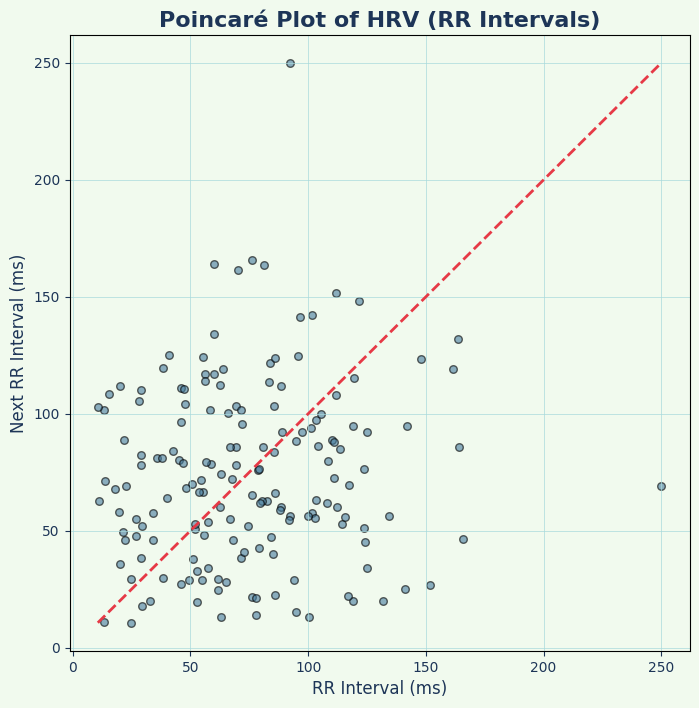

SD1 (short-term HRV): 36.65 ms
SD2 (long-term HRV): 40.02 ms


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming HRV data (RR intervals) is loaded into df_hrv with 'value' column representing RR intervals in milliseconds
df_hrv = pd.read_csv(base_path + 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv', sep=',', skiprows=1)
df_hrv['startDate'] = pd.to_datetime(df_hrv['startDate'])

# Extract consecutive RR intervals (HRV values)
rr_intervals = df_hrv['value'].dropna().values  # Use HRV values from the dataset

# Create lagged RR intervals for Poincaré plot
rr_intervals_lag = rr_intervals[:-1]  # RR intervals without the last point
rr_intervals_shift = rr_intervals[1:]  # RR intervals without the first point

# Apply Coolors palette for improved aesthetics
colors = {
    'scatter': '#457B9D',   # Steel blue for scatter points
    'line_identity': '#E63946',  # Red for line of identity
    'background': '#F1FAEE',  # Light background
    'grid': '#A8DADC',  # Teal for grid lines
    'text': '#1D3557'  # Dark blue for text
}

# Create the Poincaré plot
plt.figure(figsize=(8, 8), facecolor=colors['background'])
plt.scatter(rr_intervals_lag, rr_intervals_shift, color=colors['scatter'], alpha=0.6, s=30, edgecolor='k')

# Plot the line of identity (y = x line)
plt.plot([min(rr_intervals), max(rr_intervals)], [min(rr_intervals), max(rr_intervals)], color=colors['line_identity'], linestyle='--', linewidth=2)

# Set labels, title, and grid
plt.title('Poincaré Plot of HRV (RR Intervals)', fontsize=16, color=colors['text'], weight='bold')
plt.xlabel('RR Interval (ms)', fontsize=12, color=colors['text'])
plt.ylabel('Next RR Interval (ms)', fontsize=12, color=colors['text'])
plt.grid(True, color=colors['grid'], linestyle='-', linewidth=0.5)

# Customize ticks and background
plt.gca().set_facecolor(colors['background'])
plt.tick_params(axis='both', colors=colors['text'])

# Show the plot
plt.show()

# Calculate SD1 (short-term HRV) and SD2 (long-term HRV)
sd1 = np.std(rr_intervals_shift - rr_intervals_lag) / np.sqrt(2)
sd2 = np.std(rr_intervals_shift + rr_intervals_lag) / np.sqrt(2)

# Output SD1 and SD2 for analysis
print(f"SD1 (short-term HRV): {sd1:.2f} ms")
print(f"SD2 (long-term HRV): {sd2:.2f} ms")


In [56]:
# Define your age (needed to calculate maximum heart rate)
age = 27  # Replace with your actual age
max_heart_rate = 220 - age

# Define heart rate zones
df_heart_rate['zone'] = pd.cut(df_heart_rate['value'], 
                               bins=[0, 0.6 * max_heart_rate, 0.7 * max_heart_rate, 0.8 * max_heart_rate, 0.9 * max_heart_rate, max_heart_rate],
                               labels=['Zone 1 (50-60%)', 'Zone 2 (60-70%)', 'Zone 3 (70-80%)', 'Zone 4 (80-90%)', 'Zone 5 (90-100%)'])

# Count time spent in each heart rate zone
zone_counts = df_heart_rate['zone'].value_counts().sort_index()

# Visualize time spent in each heart rate zone
fig_zones = px.bar(zone_counts, x=zone_counts.index, y=zone_counts.values, title='Time Spent in Each Heart Rate Zone',
                   labels={'y': 'Time (in data points)', 'zone': 'Heart Rate Zone'})
fig_zones.update_layout(yaxis_title='Time (data points)', xaxis_title='Heart Rate Zone')
fig_zones.show()


In [54]:
# Assuming df_heart_rate contains periods of exercise, calculate recovery rate (example: compare heart rate right after activity and 1 minute after)
df_heart_rate['minute'] = df_heart_rate['startDate'].dt.minute
df_recovery = df_heart_rate.groupby('minute').apply(lambda x: x.iloc[0]['value'] - x.iloc[-1]['value'])

# Visualize recovery rate
fig_recovery = px.line(df_recovery, title='Heart Rate Recovery Over Time', labels={'value': 'Heart Rate Difference (BPM)'})
fig_recovery.update_layout(yaxis_title='Heart Rate Drop (BPM)', xaxis_title='Minute After Exercise')
fig_recovery.show()
